<a href="https://colab.research.google.com/github/Muhammadali295/my-learning/blob/class/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the value of theta using Gradient Descent

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=2000):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))

    # Initialize theta with zeros
    theta = np.zeros((X.shape[1], 1))

    m = len(y)

    for i in range(num_iterations):
        # Compute predictions
        predictions = np.dot(X, theta)

        # Compute errors

        errors = predictions - y
        # Compute gradient

        gradient = (1 / m) * np.dot(X.T, errors)



        theta -= learning_rate * gradient


    return theta

def predict(X, theta):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))
    # Predict y values
    y_pred = np.dot(X, theta)
    return y_pred

def mean_squared_error(y_true, y_pred):
    # Calculate mean squared error
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Example usage:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature
y = np.array([2, 4, 5, 4, 5]).reshape(-1, 1)  # Target variable
print("Features")
print(X)
print("Target Variables")
print(y)

# Train the model using gradient descent
theta = gradient_descent(X, y)

# Make predictions
y_pred = predict(X, theta)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

print("Model coefficients (theta):", theta.flatten())
print("Mean Squared Error:", mse)

Features
[[1]
 [2]
 [3]
 [4]
 [5]]
Target Variables
[[2]
 [4]
 [5]
 [4]
 [5]]
Model coefficients (theta): [2.13593338 0.61774543]
Mean Squared Error: 0.4807470965220588


# Logistic Regression

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature. First let’s load the data:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
features = iris["feature_names"]
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
target = iris["target_names"]
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba



array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

Text(0, 0.5, 'Probability')

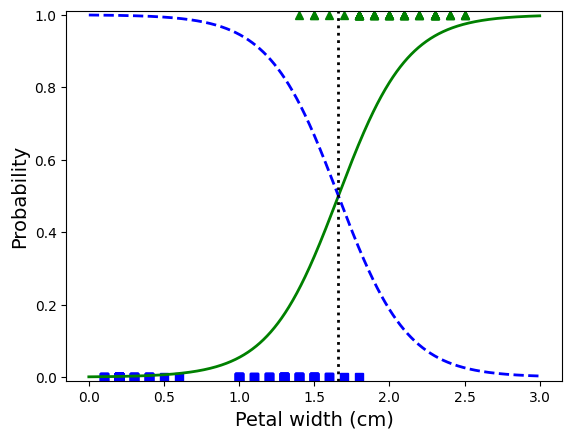

In [ ]:
plt.ylim(-0.01, 1.01)
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
#print(decision_boundary)
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)


The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap.
Above about 2 cm the classifier is highly confident that the flower is an Iris-
Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-
Virginica, or else it will predict that it is not (even if it is not very confident):

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Finding the value of theta using Gradient Descent

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(X, y, learning_rate=0.01, num_iterations=2000):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))

    # Initialize theta with zeros
    theta = np.zeros((X.shape[1], 1))

    m = len(y)

    for i in range(num_iterations):
        # Compute predictions
        z = np.dot(X, theta)
        predictions = sigmoid(z)

        # Compute errors
        errors = predictions - y

        # Compute gradient
        gradient = (1 / m) * np.dot(X.T, errors)

        # Update theta
        theta -= learning_rate * gradient

    return theta

def predict_logistic(X, theta):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))
    # Predict probabilities
    z = np.dot(X, theta)
    probabilities = sigmoid(z)
    # Convert probabilities to binary predictions
    binary_predictions = (probabilities >= 0.5).astype(int)
    return binary_predictions

# Example usage:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature
y = np.array([0, 0, 1, 1, 1]).reshape(-1, 1)  # Target variable (binary)

print("Features")
print(X)
print("Target Variables")
print(y)

# Train the model using gradient descent
theta = gradient_descent_logistic(X, y)

# Make predictions
y_pred = predict_logistic(X, theta)

print("Model coefficients (theta):", theta.flatten())
print("Predictions:", y_pred.flatten())


Features
[[1]
 [2]
 [3]
 [4]
 [5]]
Target Variables
[[0]
 [0]
 [1]
 [1]
 [1]]
Model coefficients (theta): [-1.98352644  1.01596286]
Predictions: [0 1 1 1 1]
